# Кинематика

В этом проекте приведены решения задач раздела "Кинематика" теоретической механики.

In [1]:
from numpy import cos, sin, array, arctan
from math import pi
from scipy.optimize import root
from scipy.integrate import quad
rad = lambda x: x * pi / 180
grad = lambda x: 180 * x / pi

In [2]:
def derivative(f,a,method='central',h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        print("Method must be 'central', 'forward' or 'backward'.")

1. Заданы уравнения движения точки х = 2t, у = 1 - 2 sin(0,1t). Определить ближайший момент времени, когда точка пересечет ось Ох.

In [3]:
x = lambda t : 2*t
y = lambda t : 1 - 2 * sin(0.1 * t)
time_solve = root(y, 1).x[0]
time_solve

5.235987755982989

2. Даны уравнения движения точки х = t^2, у = sin (πt), z = cos (πt) Определить модуль скорости точки в момент времени t = 1 с.

In [4]:
f = [
      lambda t : 2*t,
      lambda t : sin(pi*t),
      lambda t : cos(pi*t)
      ]

time_mot = 1
speed = 0
for ix in f:
  speed += derivative(ix, time_mot, 'backward') ** 2

speed ** 0.5

3.7240827978669797

3. Положение линейки АВ определяется углом φ = 0,5t. Определить в см/с проекцию скорости точки М на ось Ох в момент времени t = 2 с, если расстояние ВМ = 0,2 м.   
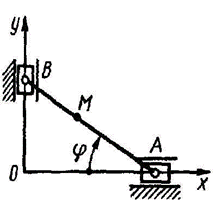

In [5]:
ts = 2
BM = 20
phi = lambda t : 0.5 * t
omega = derivative(phi, ts)
- omega * BM * sin(phi(ts))

-8.414709848078878

4. Проекция скорости точки vx = 2 cos π t. Определить координату х точки в момент времени t = 1 с, если при to = 0 координата xо = 0.

In [6]:
vx = lambda t : 2 * cos(pi*t)
ts = 1
round(quad(vx, 0, ts)[0],1)

0.0

5. Скорость автомобиля равномерно увеличивается в течение 12 с от нуля до 60 км/ч. Определить ускорение автомобиля.

In [7]:
speed = 60 / 3.6
t = 12
boost = speed / t
boost

1.388888888888889

6. Точка движется по прямой. Дан график ускорения а = f(t). Определить скорость точки в момент времени t = 6 с, если при t0 = 0 скорость v0 = 0.   
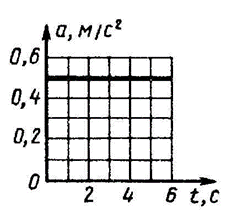

In [8]:
t = 6
a = 0.5
speed = a * t
speed

3.0

7. Сколько секунд должен работать двигатель, который сообщает ракете ускорение 3g, чтобы скорость ракеты в прямолинейном движении возросла с 3 до 5 км/с?  

In [9]:
g = 9.8061
v1 = 3000
v2 = 5000
boost = 3 * g
ts = (v2 - v1) / boost
ts

67.98489375660728

8. Положение кривошипа ОА определяется углом φ = 2t. Определить проекцию ускорения ах точки А в момент времени t = 1 с, если длина ОА = 1 м.  
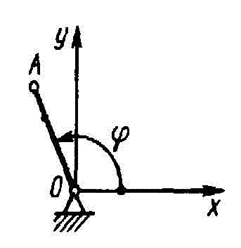

In [10]:
phi = lambda t: 2 * t
OA = 1
ts = 1
derivative(phi, ts) ** 2 / OA  * cos(phi(ts))

-1.6645873461885725

9. Даны уравнения движения точки: х = 0,3 t^3 , у = 2t^2 , где х и у - в см. Определить, в какой момент времени t ускорение точки равно 7 см/с^2.

In [11]:
x = lambda t : 0.3 * t ** 3
y = lambda t : 2 * t **2
boost = 7
ax = lambda t : derivative(lambda t : derivative(x, t), t)
ay = lambda t : derivative(lambda t : derivative(y, t), t)
a = lambda t : boost - (ax(t)**2 + ay(t)**2)**0.5
root(a, 1).x[0]

3.191423692523865

10. При равномерном вращении маховик делает 4 оборота в секунду. За сколько секунд маховик повернется на угол φ = 24π

In [12]:
N = 4
phi = 24 * pi
omega = 2 * pi * N
phi / omega

3.0

11. Частота вращения маховика за время t1 = 10 с уменьшилась в 3 раза и стала равной 30 об/мин. Определить угловое ускорение вала, если он вращался равнозамедленно.

In [13]:
t_1 = 10
n_1 = 90 / 60
n_2 = 30 / 60
2 * pi * (n_2 - n_1) / t_1

-0.6283185307179586

12. Тело вращается вокруг неподвижной оси согласно закону φ = t^3 + 2. Определить угловую скорость тела в момент времени, когда угол поворота φ = 10 рад.

In [14]:
corner = 10
phi = lambda t : t ** 3 + 2 - 10
t = root(phi, 1).x[0]
derivative(phi, t)

12.000099999999847

13. Тело вращается вокруг неподвижной оси согласно закону φ = t^2. Определите скорость точки тела на расстоянии r = 0.5 м от оси вращения в момент времени, когда угол поворота φ = 25 рад.

In [15]:
corner = 25
r = 0.5
phi = lambda t : t ** 2 - corner
t = root(phi, 0).x[0]
derivative(phi, t) * r

4.999999999999893

14. Скорость точки тела на расстоянии r = 0,2 м от оси вращения изменяется по закону v = 4t^2. Определить угловое ускорение данного тела в момент времени t = 2 с.

In [16]:
r = 0.2
v = lambda t : 4 * t **2
ts = 2
derivative(v, ts) / r

79.99999999999874

15. В данный момент времени тело совершает мгновенное вращение относительно точки касания его с плоскостью. Определить угловую скорость тела, если скорость точки С равна 10 м/с, а расстояние АС = 20 см.   
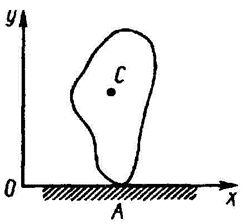

In [17]:
AC = 0.2
v_c = 10
v_c / AC

50.0

16. Определить угловую скорость колеса, если точка А имеет скорость vA= 10 м/с, а радиус колеса r = 0,2 м.   
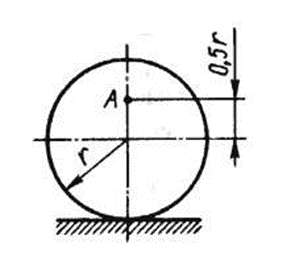

In [18]:
r = 0.2
v_A = 10
OA = 0.5 * r
omega = v_A / (OA + r)
omega

33.33333333333333

17. Стержень АВ длиной 60 см движется в плоскости чертежа. В некоторый момент времени точки А и В стержня имеют скорости v_A = 4 м/с, v_B = 2 м/с. Определить расстояние от точки А до мгновенного центра скоростей.   
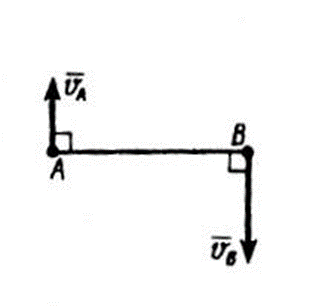

In [19]:
AB = 0.6
v_A = 4
v_B = 2
mcs = v_A * AB / (v_A + v_B)
mcs

0.39999999999999997

18. Кривошип ОА механизма, вращаясь равномерно, образует в данный момент времени с направлением ОВ угол φ = 90°. Определить расстояние от мгновенного центра скоростей шатуна АВ до ползуна В.  
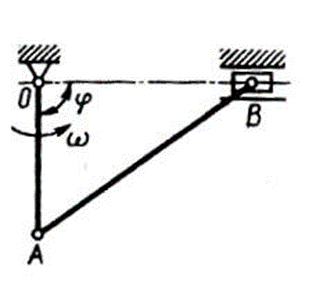

In [20]:
# поскольку векторы скорости в точках А и В параллельны друг другу,
# расстояние до МЦС от точки В стремится к бесконечности

19. Определить скорость точки В колеса, если точка А колеса имеет скорость 2 м\с.   
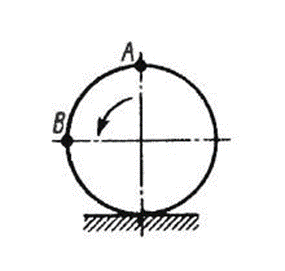

In [21]:
omega = lambda r : 2 / (2 * r)
r_B = lambda r : (r ** 2 + r ** 2) ** 0.5
v_B = omega(r) * r_B(r)
v_B

1.4142135623730954

20. Автомобиль двигается со скоростью v1 = 3,6 км/ч, а монтажная вышка поднимается со скоростью v2 = 0,5 м/с. Определить абсолютную скорость рабочего, который стоит на вышке неподвижно.   
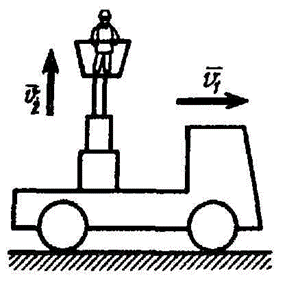

In [22]:
v_1 = 3.6 / 3.6
v_2 = 0.5
(v_1 ** 2 + v_2 ** 2) ** 0.5

1.118033988749895

P.S. ну и бонус к новому году!

In [23]:
!pip install colorama

In [24]:
from colorama import Fore

def heart_shape(msg="C новым годом! "):
    lines = list()
    for y in range(17, -17, -1):
        line = ""
        for x in range(-45, 45):
          f = ((x * 0.03) ** 2 + (y * 0.1) ** 2 - 1) ** 3 - (x * 0.05) ** 2 * (y * 0.1) ** 3
          line += msg[(x - y) % len(msg)] if f <= 0 else " "
        lines.append(line)
    print(Fore.GREEN+"\n".join(lines))
heart_shape()

                                                                                          
                                                                                          
                                                                                          
            ! C новым годом! C                               новым годом! C нов           
       одом! C новым годом! C новым г                 ом! C новым годом! C новым год      
     годом! C новым годом! C новым годом!         годом! C новым годом! C новым годом!    
    годом! C новым годом! C новым годом! C н   м годом! C новым годом! C новым годом! C   
   годом! C новым годом! C новым годом! C новым годом! C новым годом! C новым годом! C но 
  годом! C новым годом! C новым годом! C новым годом! C новым годом! C новым годом! C нов 
  одом! C новым годом! C новым годом! C новым годом! C новым годом! C новым годом! C новы 
  дом! C новым годом! C новым годом! C новым годом! C новым годом! C новым годом! C новым 